In [174]:
import re
import os
import warnings
# filter warnings
import plotly.express as px

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.datasets import  load_files
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [175]:
data = pd.read_csv(r'data/spambase.data', names=[x for x in range(58)])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [176]:
data = data.fillna(data.mean())

In [177]:
data.rename(columns={ data.columns[57]: "Decision" }, inplace = True)

In [178]:
X = data.iloc[:,:57]
y = data['Decision']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
X = scaler.transform(X)

In [182]:
n = data['Decision']

# PCA

In [183]:
pca = PCA(n_components=2).fit_transform(X)

In [184]:
fig = px.scatter(pca,
                 x=0, y=1,
                 labels={
                     "0": "Principal component 0",
                     "1": "Principal component 1"
                        },
                 title = 'PCA plot',
                 color=data['Decision']).update(layout = dict(title = dict(x = 0.5)))
fig.show()

In [185]:
component = pd.DataFrame(pca)
component.head(10)

,0,1
0,-0.723091,-0.063881
1,-1.150971,2.166156
2,-1.390328,5.106827
3,-0.808955,0.455307
4,-0.809664,0.454809
5,-0.522883,-0.573167
6,-0.980056,1.004559
7,-0.531971,-0.568598
8,-1.231775,3.605685
9,-0.846070,0.487380


# Clustering

In [159]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as sch

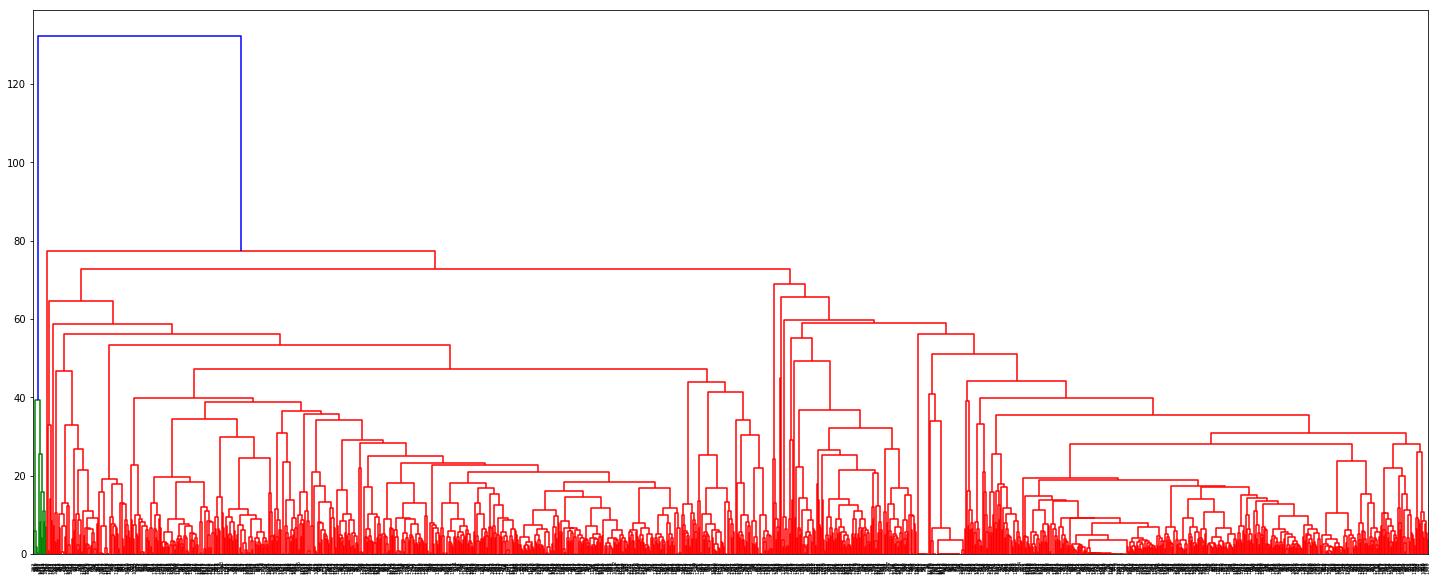

In [161]:
Z = linkage(X_test, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()